# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

# Data Ingestion

In [2]:
data = pd.read_csv("Diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA AND Feature Engineeering on data

In [4]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# found that all are numerical variable

In [6]:
# Checking null values

data.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [7]:
# no null values

In [8]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
# lets check values of each variable
data["Glucose"].values

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
       147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
       111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
        88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
        99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
       131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
       123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
        85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146, 124,
        78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117, 105,
       173, 122, 170,  84,  96, 125, 100,  93, 129, 105, 128, 106, 108,
       108, 154, 102,  57, 106, 147,  90, 136, 114, 156, 153, 188, 152,
        99, 109,  88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110,
       111, 102, 134,  87,  79,  75, 179,  85, 129, 143, 130,  8

In [10]:
# as we found that glucose have many zero value that is not possible

In [11]:
data["BloodPressure"].values

array([ 72,  66,  64,  66,  40,  74,  50,   0,  70,  96,  92,  74,  80,
        60,  72,   0,  84,  74,  30,  70,  88,  84,  90,  80,  94,  70,
        76,  66,  82,  92,  75,  76,  58,  92,  78,  60,  76,  76,  68,
        72,  64,  84,  92, 110,  64,  66,  56,  70,  66,   0,  80,  50,
        66,  90,  66,  50,  68,  88,  82,  64,   0,  72,  62,  58,  66,
        74,  88,  92,  66,  85,  66,  64,  90,  86,  75,  48,  78,  72,
         0,  66,  44,   0,  78,  65, 108,  74,  72,  68,  70,  68,  55,
        80,  78,  72,  82,  72,  62,  48,  50,  90,  72,  60,  96,  72,
        65,  56, 122,  58,  58,  85,  72,  62,  76,  62,  54,  92,  74,
        48,  60,  76,  76,  64,  74,  80,  76,  30,  70,  58,  88,  84,
        70,  56,  64,  74,  68,  60,  70,  60,  80,  72,  78,  82,  52,
        66,  62,  75,  80,  64,  78,  70,  74,  65,  86,  82,  78,  88,
        52,  56,  74,  72,  90,  74,  80,  64,  88,  74,  66,  68,  66,
        90,  82,  70,   0,  60,  64,  72,  78, 110,  78,  82,  8

In [12]:
# as we found that blood pressure have many zero value that is not possible

In [13]:
data["SkinThickness"].values

array([35, 29,  0, 23, 35,  0, 32,  0, 45,  0,  0,  0,  0, 23, 19,  0, 47,
        0, 38, 30, 41,  0,  0, 35, 33, 26,  0, 15, 19,  0, 26, 36, 11,  0,
       31, 33,  0, 37, 42, 47, 25,  0, 18, 24,  0, 39,  0, 27, 32,  0, 11,
       15, 21, 34, 42, 10, 39, 60,  0, 41,  0,  0,  0, 34,  0, 27, 30,  0,
       13, 27, 20, 35,  0, 20, 30, 20,  0, 33,  0, 22, 13,  0, 26, 28,  0,
       29, 54, 25, 32, 19,  0, 15, 40,  0, 18, 27, 28, 18, 30, 51,  0,  0,
        0, 18,  0, 29,  0, 28, 31, 25, 33, 26, 34,  0, 32,  0,  0,  0, 23,
       15, 56, 39, 30,  0,  0, 42, 30, 36, 24,  0, 14,  0, 37, 31, 13, 20,
       26, 25,  0, 29,  0, 30, 26,  0, 31, 23, 37, 35,  0, 17, 50,  0, 28,
       42,  0, 44, 15, 21, 19, 41, 38, 40, 34, 23,  0, 18, 25,  0,  0, 12,
        0, 23, 23, 42, 24, 42,  0, 46,  0,  0,  0, 18, 20,  0,  0, 28, 36,
       41, 39, 35,  0, 44,  0,  0, 20, 41,  0, 13, 44, 27, 16,  0, 20, 16,
       32, 28, 29,  0, 27, 33, 22, 54, 31, 26, 32, 40, 41, 30, 22,  0, 29,
        0,  0, 33, 15, 27

In [14]:
# as we found that skin thickness  have many zero value that is not possible

In [15]:
data["Insulin"].values

array([  0,   0,   0,  94, 168,   0,  88,   0, 543,   0,   0,   0,   0,
       846, 175,   0, 230,   0,  83,  96, 235,   0,   0,   0, 146, 115,
         0, 140, 110,   0,   0, 245,  54,   0,   0, 192,   0,   0,   0,
       207,  70,   0,   0, 240,   0,   0,   0,   0,   0,   0,  82,  36,
        23, 300, 342,   0, 304, 110,   0, 142,   0,   0,   0, 128,   0,
         0,   0,   0,  38, 100,  90, 140,   0, 270,   0,   0,   0,   0,
         0,   0,   0,   0,  71,   0,   0, 125,   0,  71, 110,   0,   0,
       176,  48,   0,  64, 228,   0,  76,  64, 220,   0,   0,   0,  40,
         0, 152,   0, 140,  18,  36, 135, 495,  37,   0, 175,   0,   0,
         0,   0,  51, 100,   0, 100,   0,   0,  99, 135,  94, 145,   0,
       168,   0, 225,   0,  49, 140,  50,  92,   0, 325,   0,   0,  63,
         0, 284,   0,   0, 119,   0,   0, 204,   0, 155, 485,   0,   0,
        94, 135,  53, 114,   0, 105, 285,   0,   0, 156,   0,   0,   0,
        78,   0, 130,   0,  48,  55, 130,   0, 130,   0,   0,   

In [16]:
# as we found that insulin have many zero value that is not possible

In [17]:
data["BMI"].values

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
       23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
       32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
       37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.8, 32.4, 36.6, 38.5,
       37.1, 26.5, 19.1, 32. , 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7,
       49.7, 39. , 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4,
       33.3, 34. , 31.2, 34. , 30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2,
       34.2, 33.6, 26.8, 33.3, 55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3,
       34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5,
       32.4, 32.8,  0. , 32.8, 30.5, 33.7, 27.3, 37

In [18]:
# as we found that BMI have many zero value that is not possible

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# lets replace all the zero values with mean of each coloumn
data["Glucose"]= data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"]= data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"]= data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]= data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]= data["BMI"].replace(0,data["BMI"].mean())

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

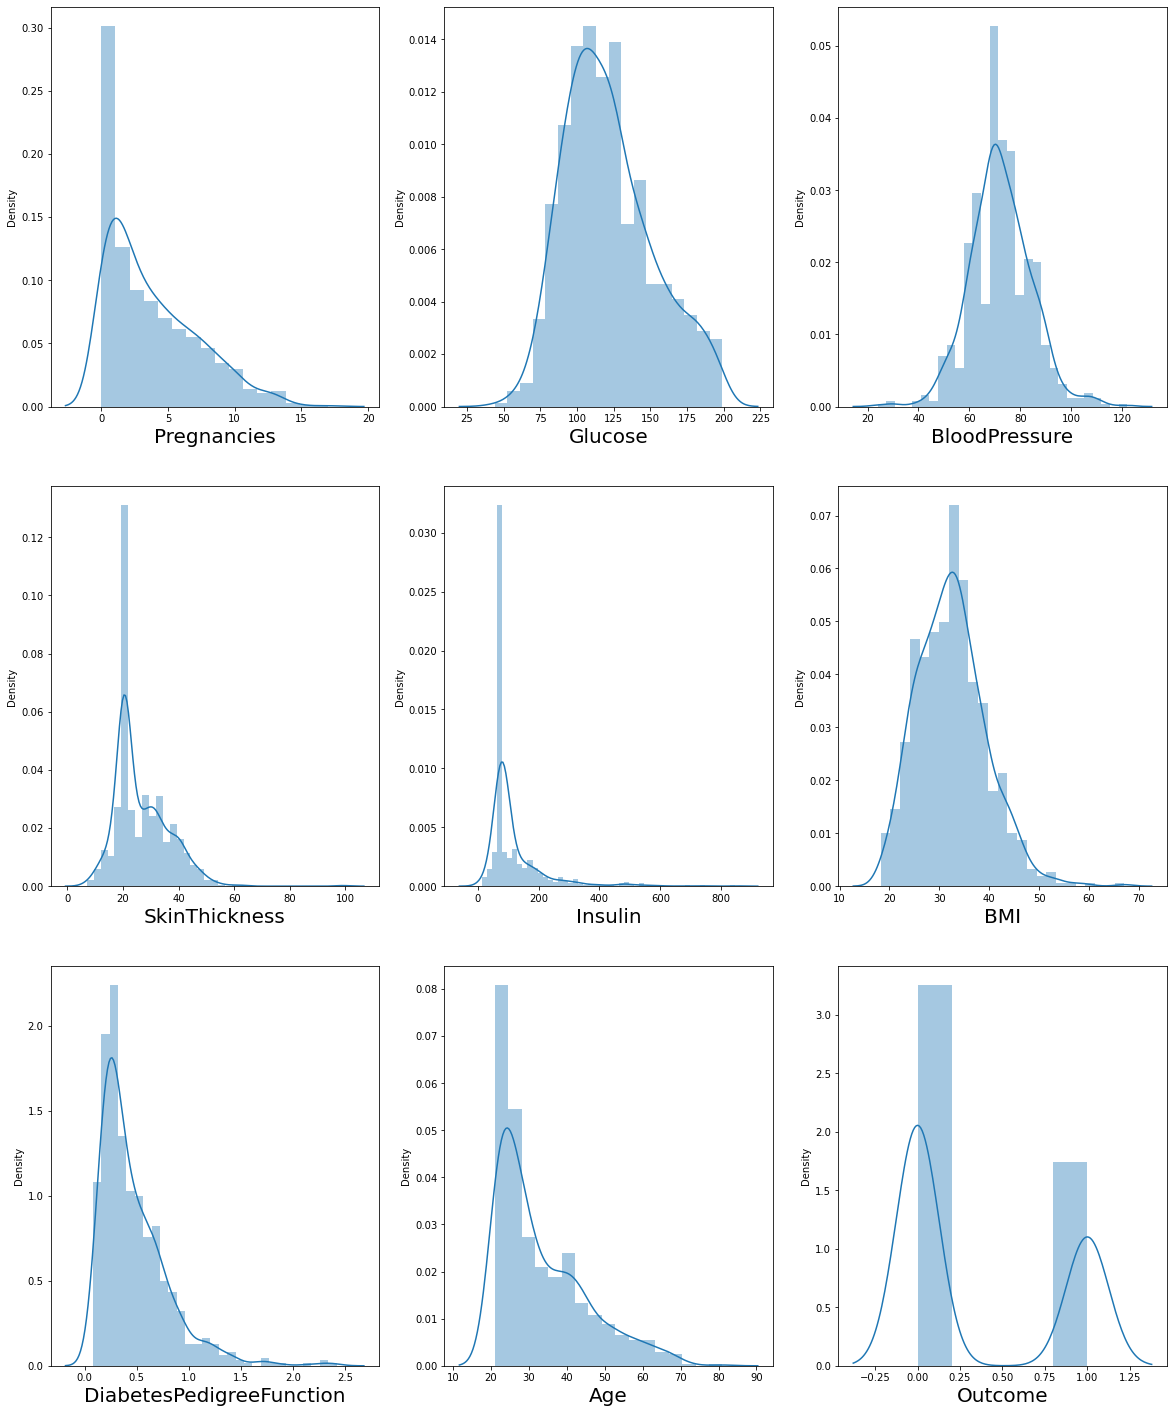

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [22]:
# data looks good but have some outliers

# Outliers handling

<AxesSubplot:>

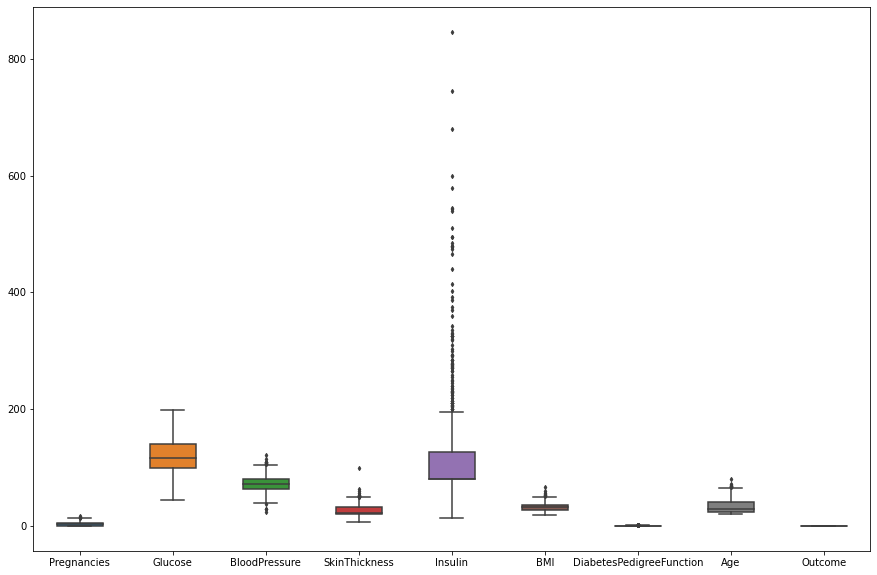

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [24]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data = data[data['Pregnancies']<q]
q = data['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data  = data[data['BMI']<q]
q = data['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data  = data[data['SkinThickness']<q]
q = data['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data  = data[data['Insulin']<q]
q = data['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data  = data[data['DiabetesPedigreeFunction']<q]
q = data['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data  = data[data['Age']<q]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

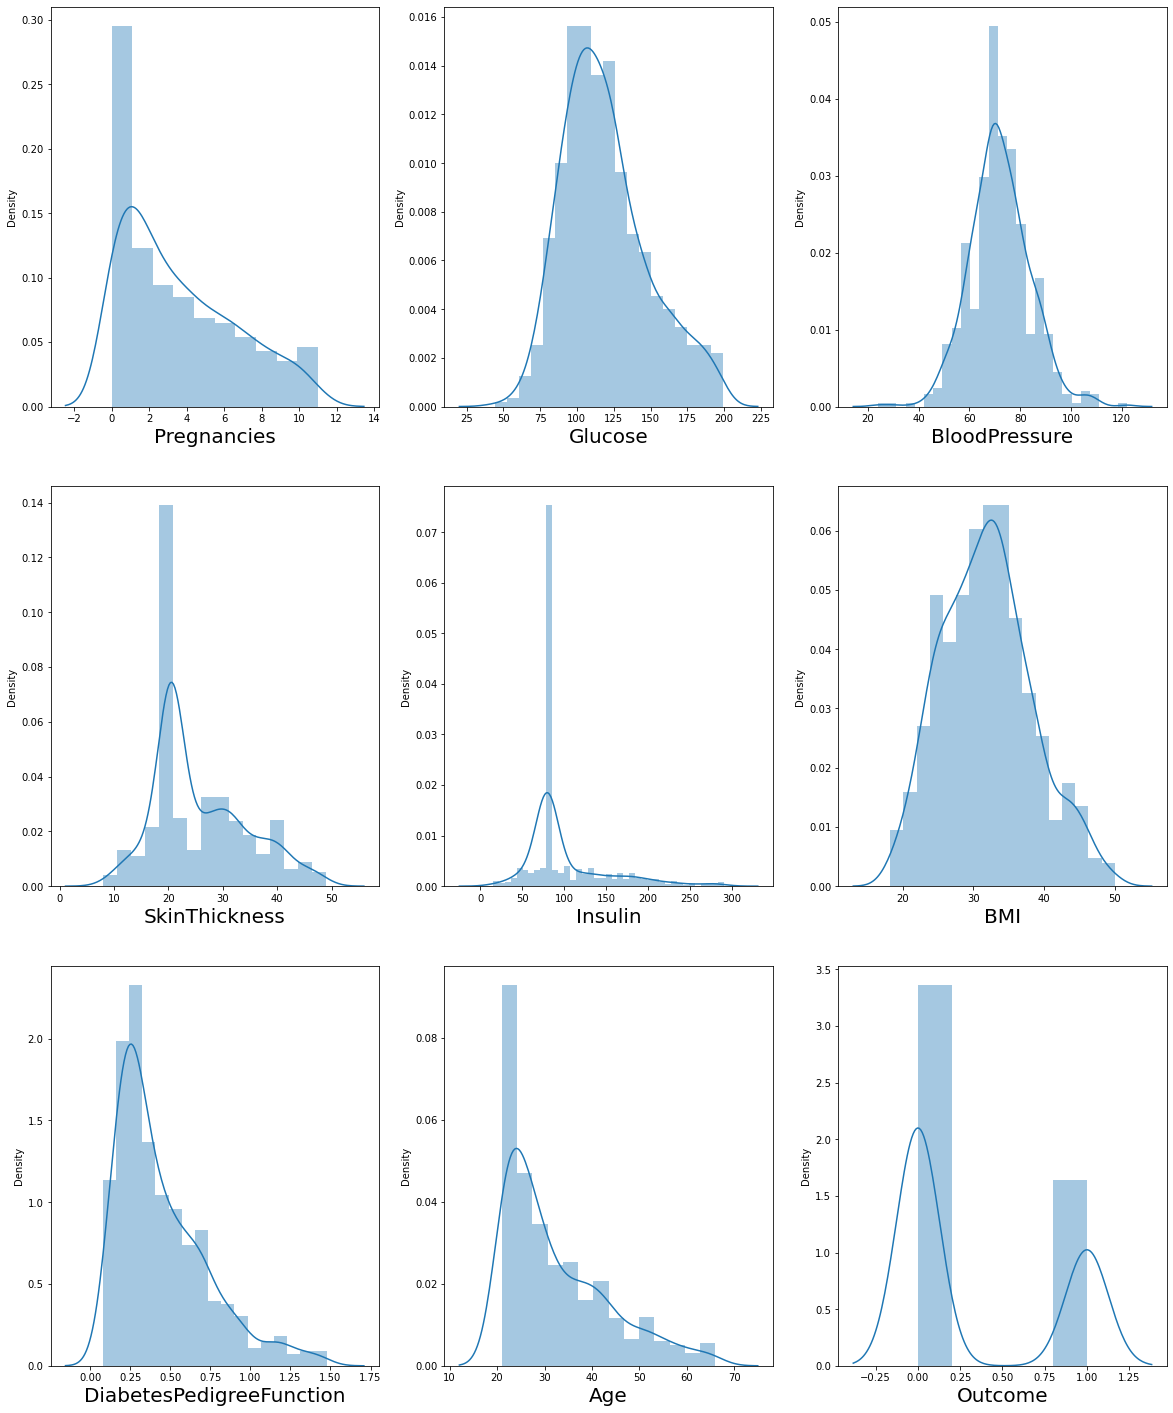

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
# now data is much better than before so lets go ahead and dont loose more data otherwise model cant train well

#  Data splitting in independent and dependent variable

In [27]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [28]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [29]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\l

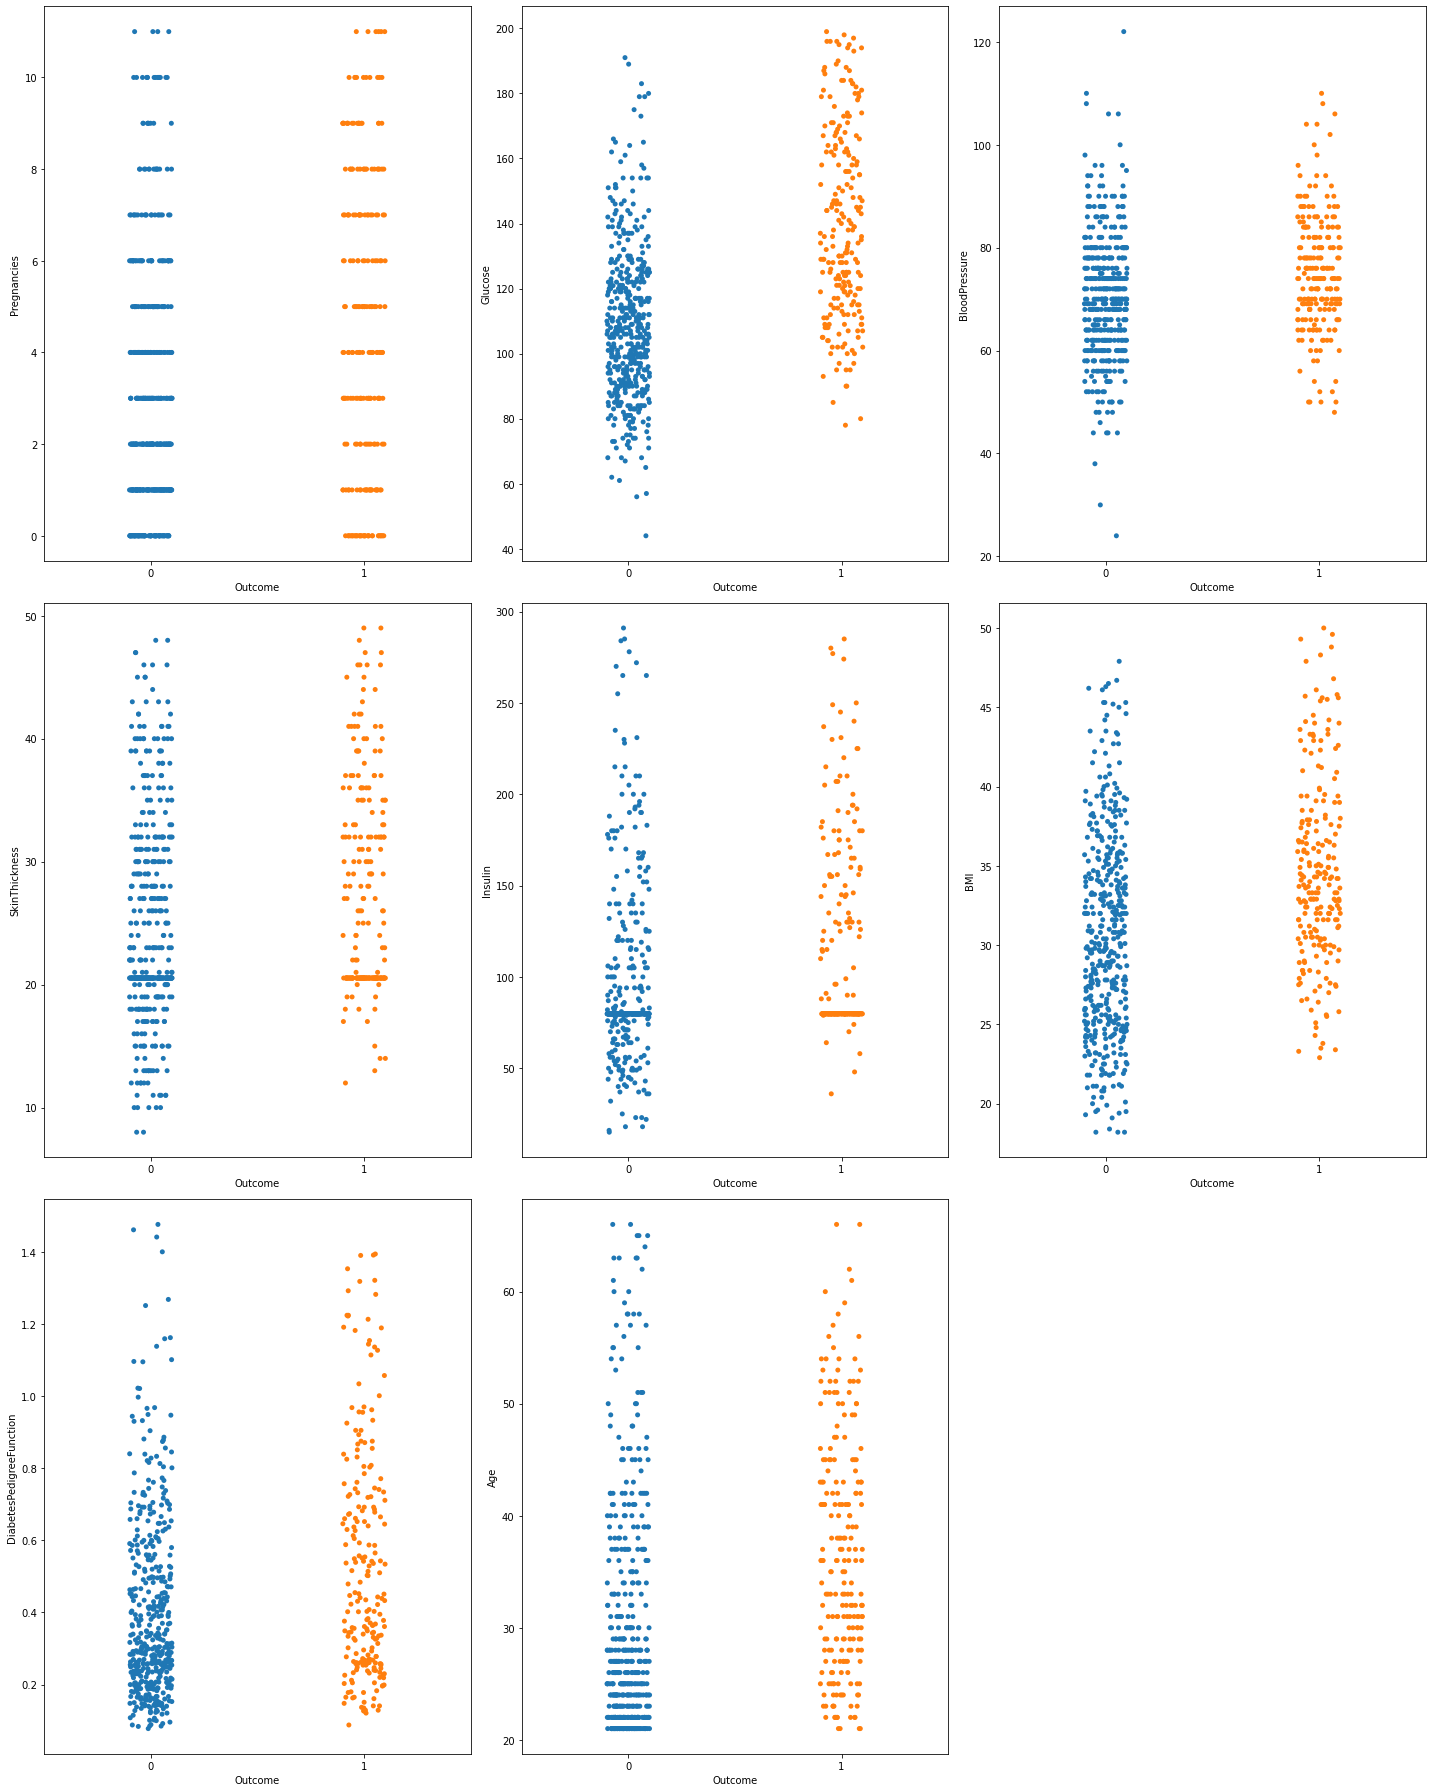

In [30]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [32]:
# lets check multicolinarity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [33]:
# splitting into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=40)

# Model building

In [34]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [38]:
# prediction

pred = log.predict(x_test)

In [39]:
pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0], dtype=int64)

In [40]:
# lets check acccuracy
accuracy= accuracy_score(y_test,pred)

In [41]:
accuracy

0.7586206896551724

In [43]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,pred)
conf_mat

array([[118,  19],
       [ 30,  36]], dtype=int64)

In [44]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [45]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7586206896551724

In [46]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8613138686131386

In [47]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7972972972972973

In [48]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8280701754385965

In [50]:
# Area Under Curve
auc = roc_auc_score(y_test,pred)
auc

0.7033842070338421

# ROC 

In [51]:
fpr, tpr, thresholds = roc_curve(y_test,pred)

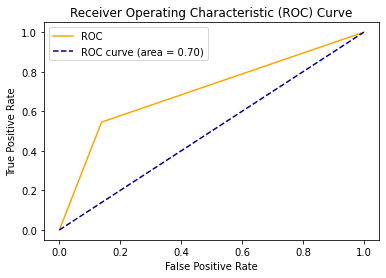

In [52]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()